# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [20]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh Aragorn 240131

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/9. Reward_Airpuff_Generalization
Target path is:
  data_Probabilistic_Reward_Airpuff_Generalization
Searching for Bear for 240207
  Copying : 240207_Bear_generalization.h5
  Copied  : 240207_Bear_generalization.h5
  Deleted : 240207_Bear_generalization.h5
  Total number of files moved: 1
Fractal folder is: 20240207
  Copied fractal folder to all fractals folder
Done.


In [21]:
%load_ext autoreload
%autoreload 2
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
# TASK = Probabilistic_Reward_Airpuff_5x2
# TASK = 'Probabilistic_Reward_Airpuff_Choice'
TASK = 'Probabilistic_Reward_Airpuff_Generalization' 

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Generalization
  Number of Total Files  : 8
  Monkey: Aragorn
    Number of Aragorn Files : 4
    Earliest Date    : 240110
    Most Recent Date : 240312
  Monkey: Bear
    Number of Bear Files : 2
    Earliest Date    : 240207
    Most Recent Date : 240308
No video folder found for task: Probabilistic_Reward_Airpuff_Generalization
Pulling '.h5' files...
  Complete: 6 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [17]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-03-08' #@param {type:"date"}
end_date = '2024-03-08' #@param {type:"date"}
monkey_input = 'Bear' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  240308_Bear_generalization.h5 - Completed
Converting .h5 to python:
  <HDF5 file "240308_Bear_generalization.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 770
  Choice task detected.
Parsing session data...


  0%|          | 0/770 [00:00<?, ?it/s]

  Complete.
    Correct trials: 300
    Errored trials: 469
    Session Length:  01:36:46
Parsing camera data...
  No camera data attached to ML file.
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-118.677,-52.871)
  Max Values (X,Y): (147.226,179.52)
  Reward Mag: 1.0
    Reward Drops: 12.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 4.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...
  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Generaliz

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [18]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num subject  trial_num  block  condition  correct  error  \
0  240308            0    bear          1      1          1        1      0   
2  240308            0    bear          3      1          1        1      0   
3  240308            0    bear          4      1          1        1      0   
4  240308            0    bear          5      1          1        1      0   
5  240308            0    bear          6      1          1        1      0   

   error_type                            behavioral_code_markers  \
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_0 x_0_pos  \
0  [2.560999942943454, 2821.686499984935, 2897.64...           _fix   [0.0]   
2  [1499.4053998962045, 1672.5910999812186, 1705....           _fix   [0.0]   
3  [1499.6683998033404, 1601.5172000043094, 1634....           _fix   [0.0]   
4  [3009.2859000433236, 3113.8484000694007, 3148....           _fix   [0.0]   
5  [1497.7938998490572, 1587.707799859345, 1639.7...           _fix   [0.0]   

  y_0_pos stimuli_name_1 x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  \
0   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
2   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
3   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
4   [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   
5   [0.0]     _fractal_C   [0.0]   [0.0]     _fractal_C   [0.0]   [0.0]   

   reward_1  reward_prob_1  reward_mag_1  reward_drops_1  reward_length_1  \
0         1            1.0           1.0            12.0            220.0   
2         1            1.0           0.5             4.0            200.0   
3         1            1.0           1.0            12.0            220.0   
4         0            0.0           0.0             0.0              0.0   
5         0            0.0           0.0             0.0              0.0   

   reward_2  reward_prob_2  reward_mag_2  airpuff_1  airpuff_prob_1  \
0         0            0.0           0.0          0             0.0   
2         0            0.0           0.0          0             0.0   
3         0            0.0           0.0          0             0.0   
4         0            0.0           0.0          0             0.0   
5         0            0.0           0.0          1             1.0   

   airpuff_mag_1  airpuff_2  airpuff_prob_2  airpuff_mag_2  \
0            0.0          0             0.0            0.0   
2            0.0          0             0.0            0.0   
3            0.0          0             0.0            0.0   
4            0.0          0             0.0            0.0   
5            0.5          0             0.0            0.0   

                                               eye_x  \
0  [-0.2615858510831739, -0.26182036101451683, -0...   
2  [-4.013476647121494, -4.013476647121494, -4.07...   
3  [11.006657668036567, 11.000809418805256, 11.00...   
4  [-3.521939758656525, -3.5234206481346804, -3.5...   
5  [-0.20560939745686962, -0.20560939745686962, -...   

                                               eye_y  \
0  [6.646685804495898, 6.652567393977402, 6.65256...   
2  [-18.962875098485437, -18.962875098485437, -19...   
3  [23.38789907123189, 23.38769346945825, 23.3876...   
4  [12.266907187138125, 12.307477951784913, 12.30...   
5  [28.09636043378187, 28.09636043378187, 28.0963...   

                                           eye_pupil  \
0  [7233.0, 7236.0, 7236.0, 7241.0, 7241.0, 7241....   
2  [5358.0, 5358.0, 5342.0, 5342.0, 5342.0, 5342....   
3  [5710.0, 5709.0, 5709.0, 5705.0, 5705.0, 5705....   
4  [5648.0, 5648.0, 5648.0, 5661.0

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

240308
  perf_by_fractal.png saved.


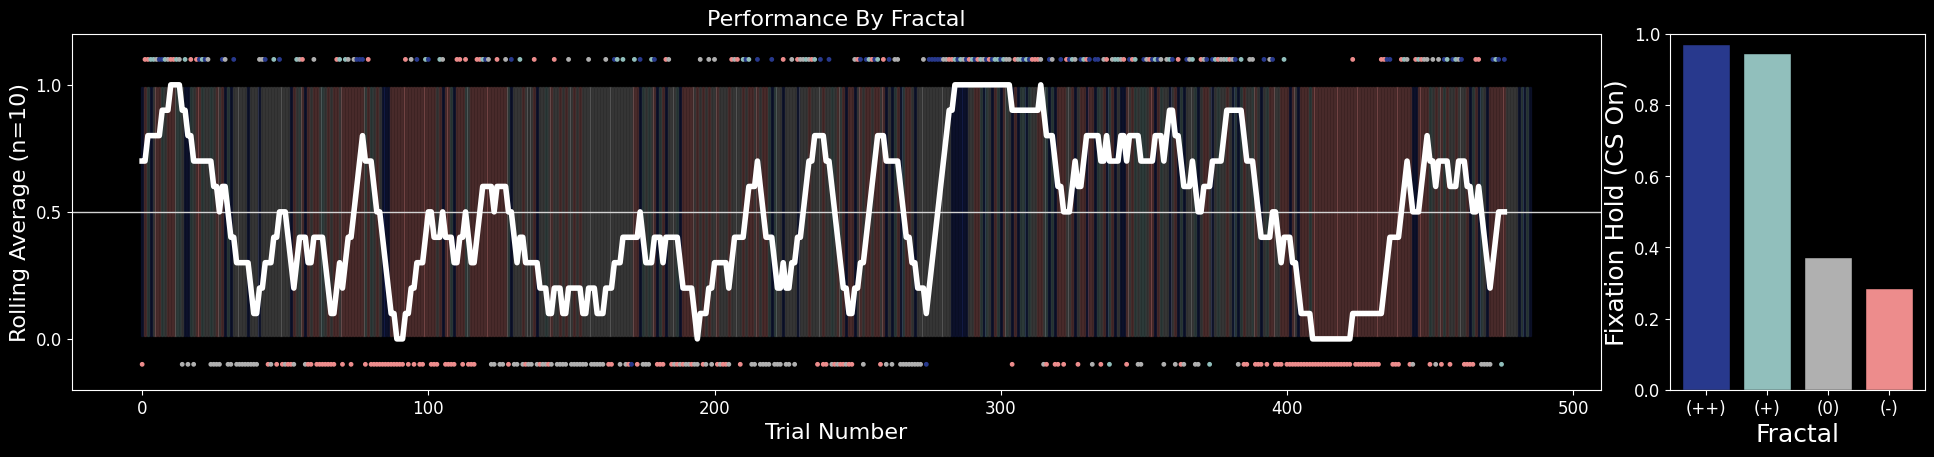

  session_latency.png saved.


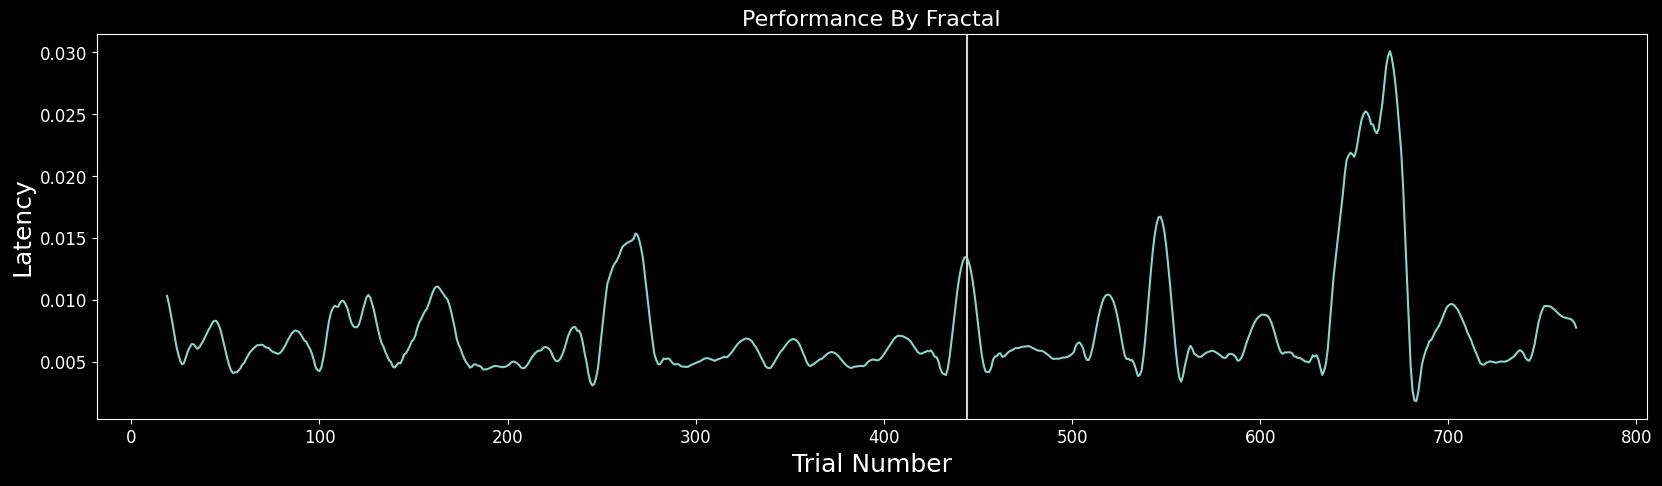

  epoch_hist.png saved.


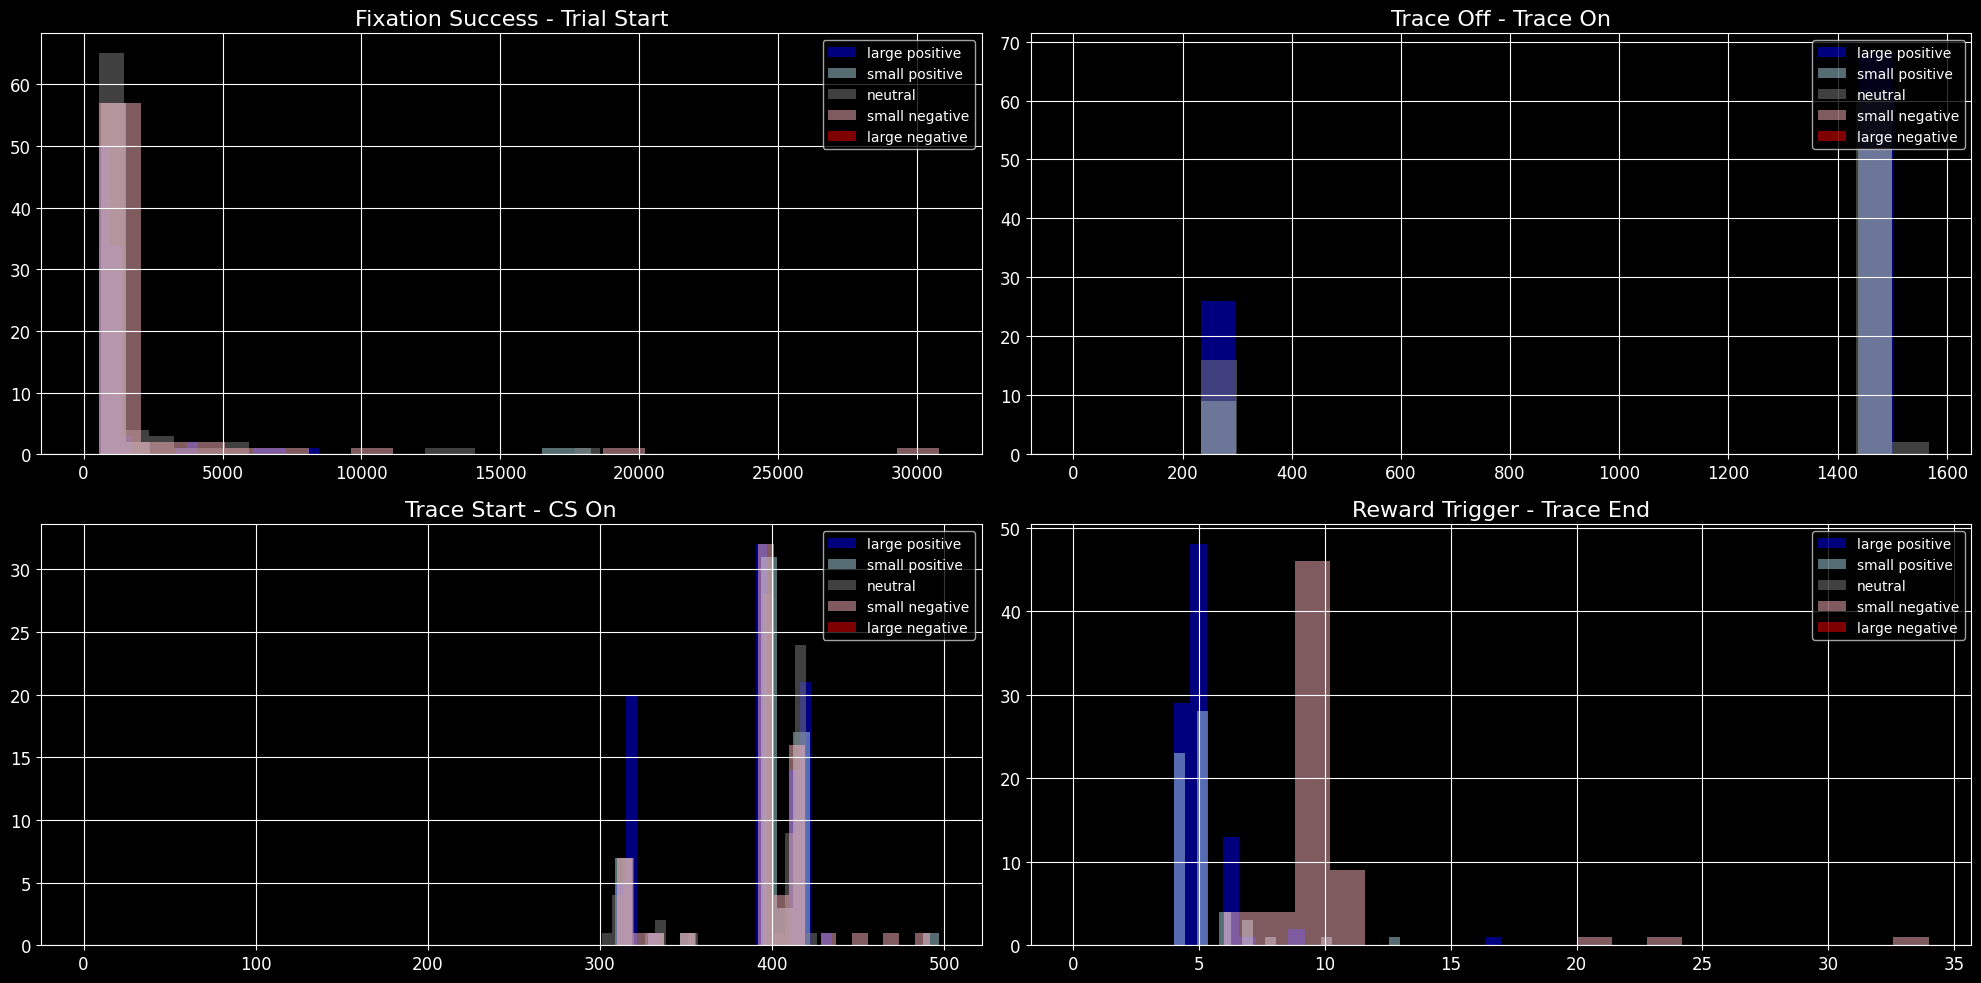

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.097 | Blink Correlation: 0.328
  Valence 0.5: Lick Correlation: -0.044 | Blink Correlation: 0.486
  Valence 0.0: Lick Correlation: -0.08 | Blink Correlation: 0.057
  Valence -0.5: Lick Correlation: -0.258 | Blink Correlation: -0.136
Block: 2
  Valence 1.0: Lick Correlation: 0.147 | Blink Correlation: 0.092
  Valence 0.5: Lick Correlation: 0.067 | Blink Correlation: 0.333
  Valence 0.0: Lick Correlation: -0.139 | Blink Correlation: 0.115
  Valence -0.5: Lick Correlation: 0.132 | Blink Correlation: -0.046


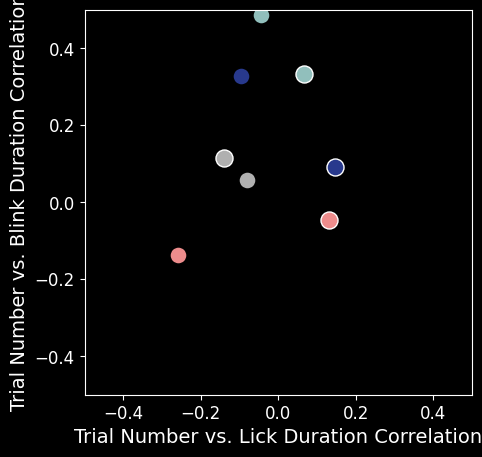

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


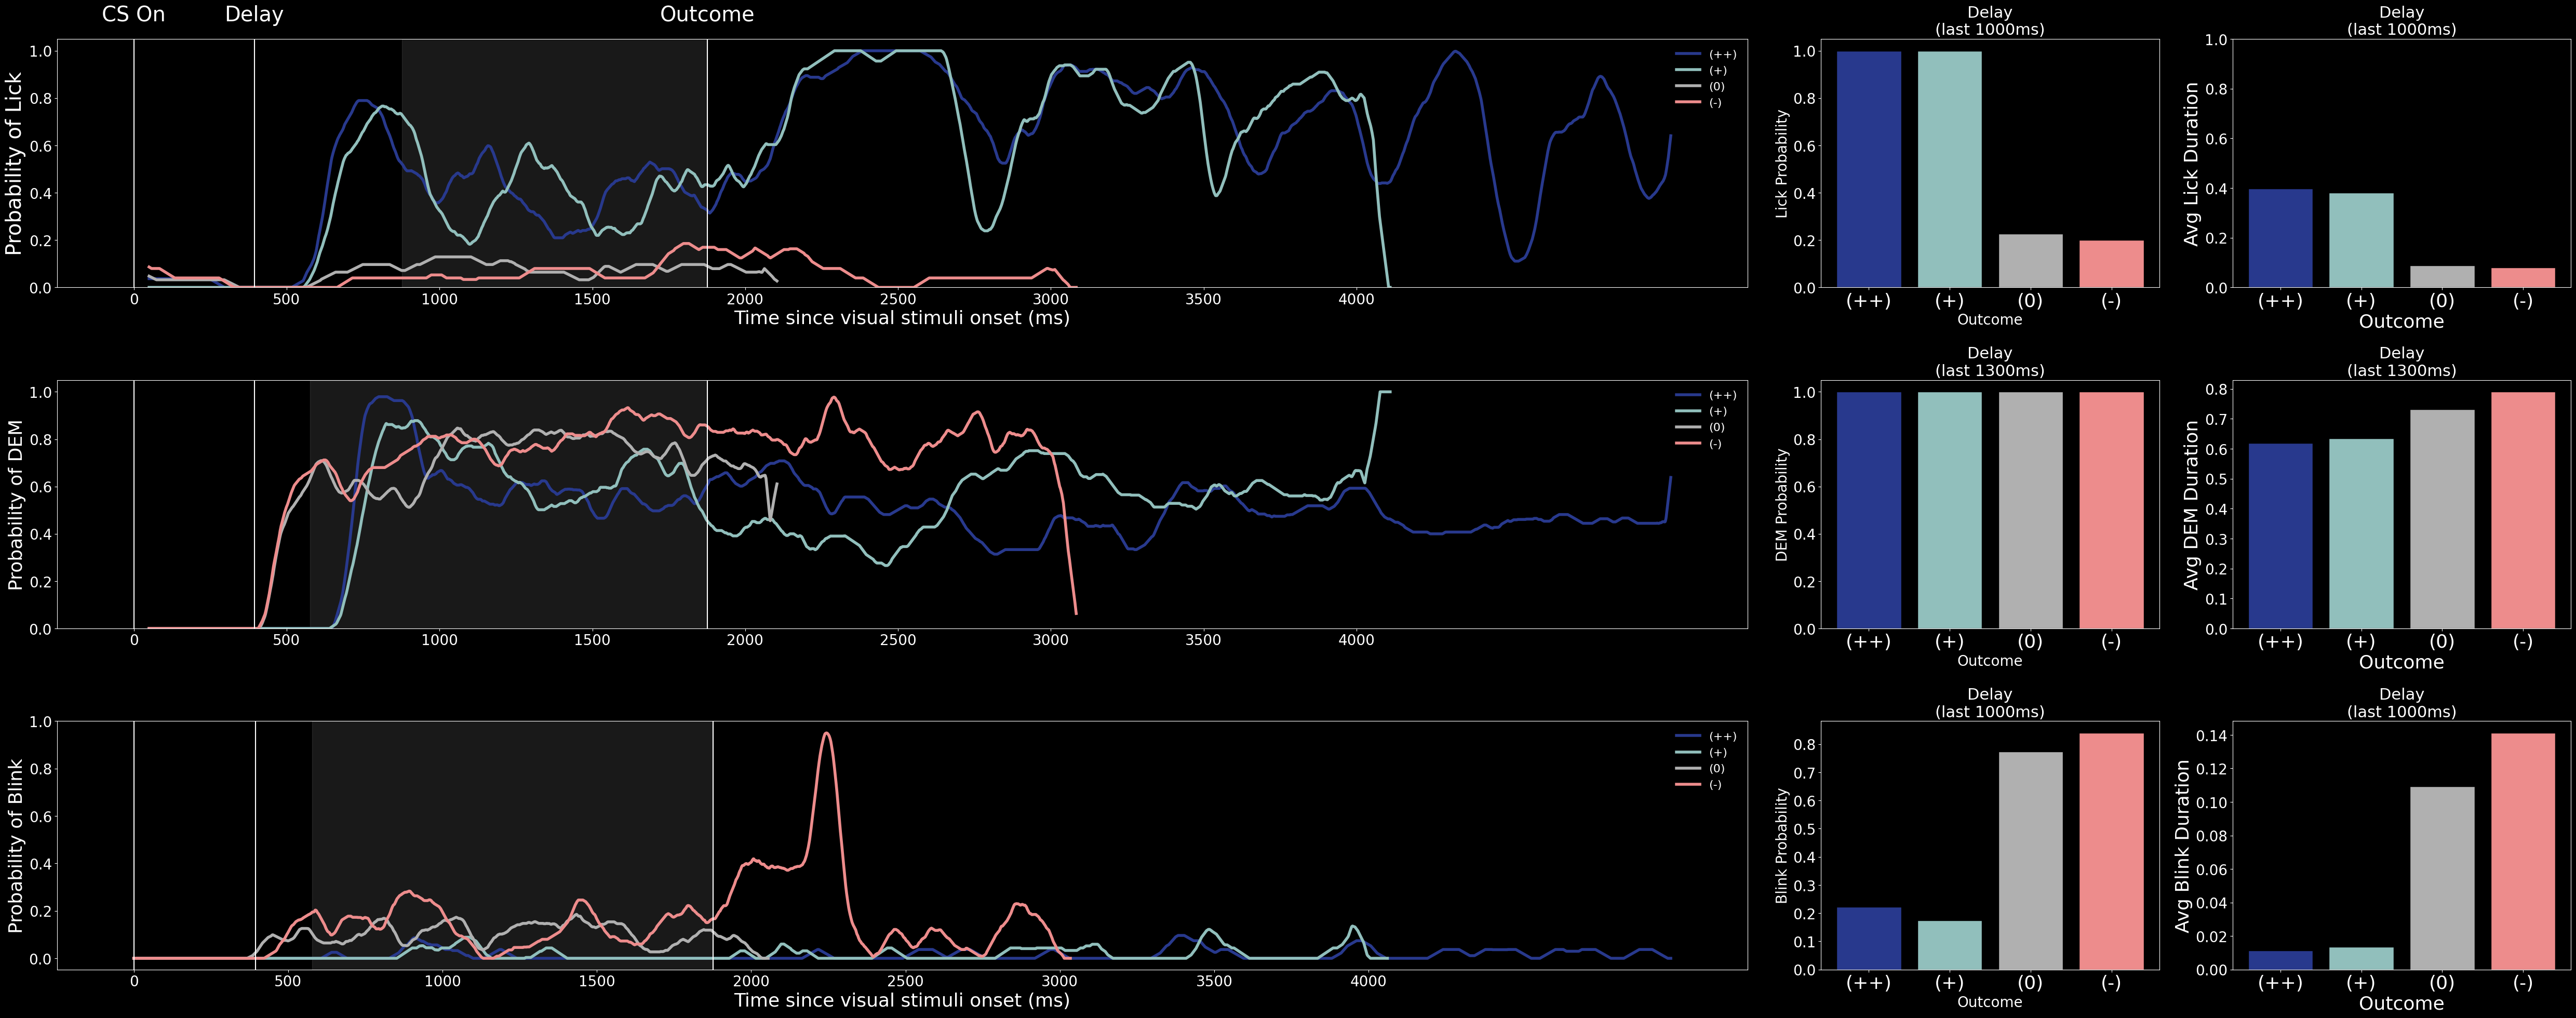

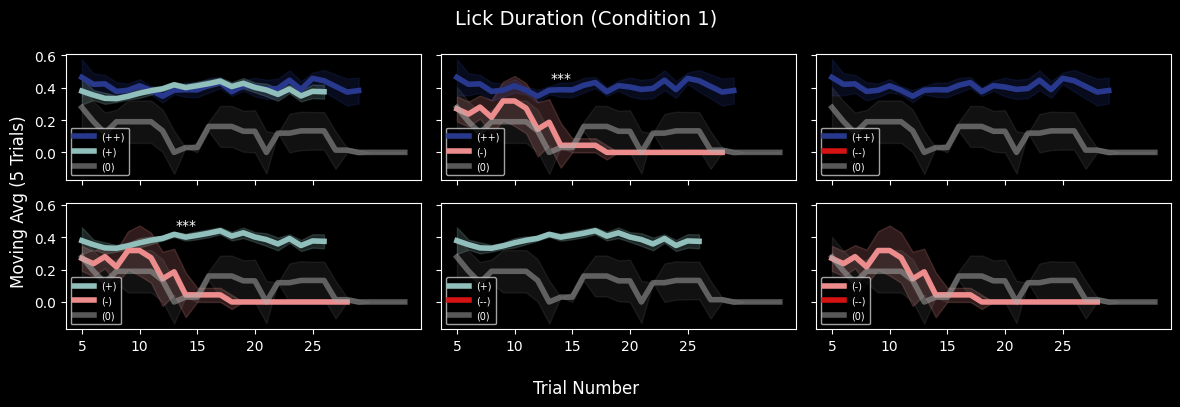

  t_test_DEM-duration_1.png saved.


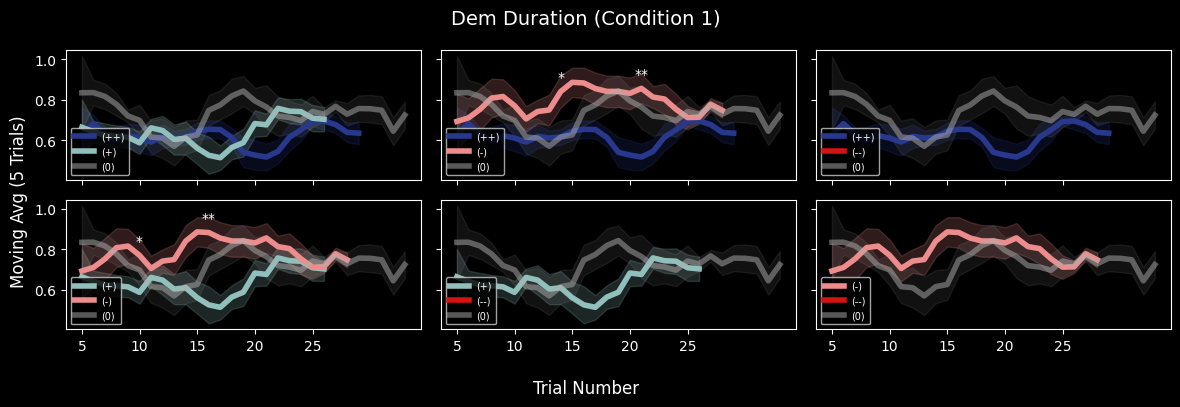

  t_test_blink-duration_1.png saved.


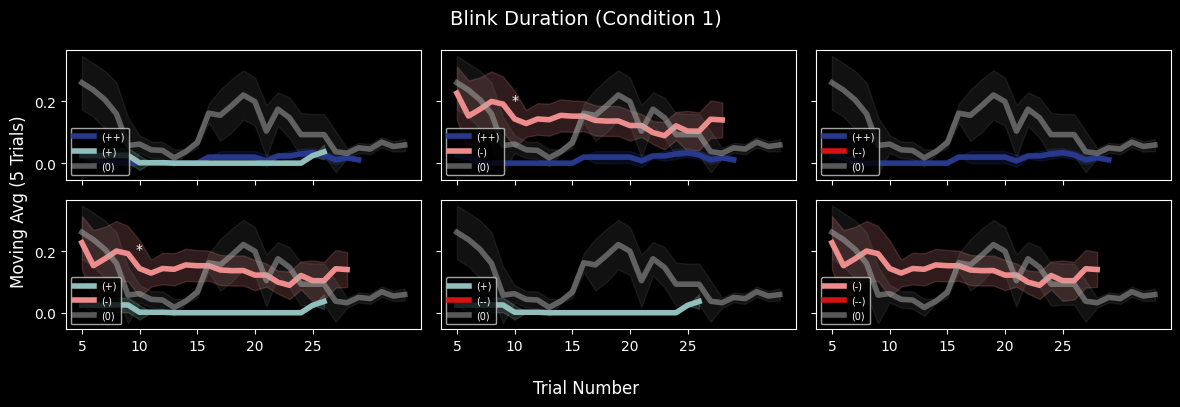

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


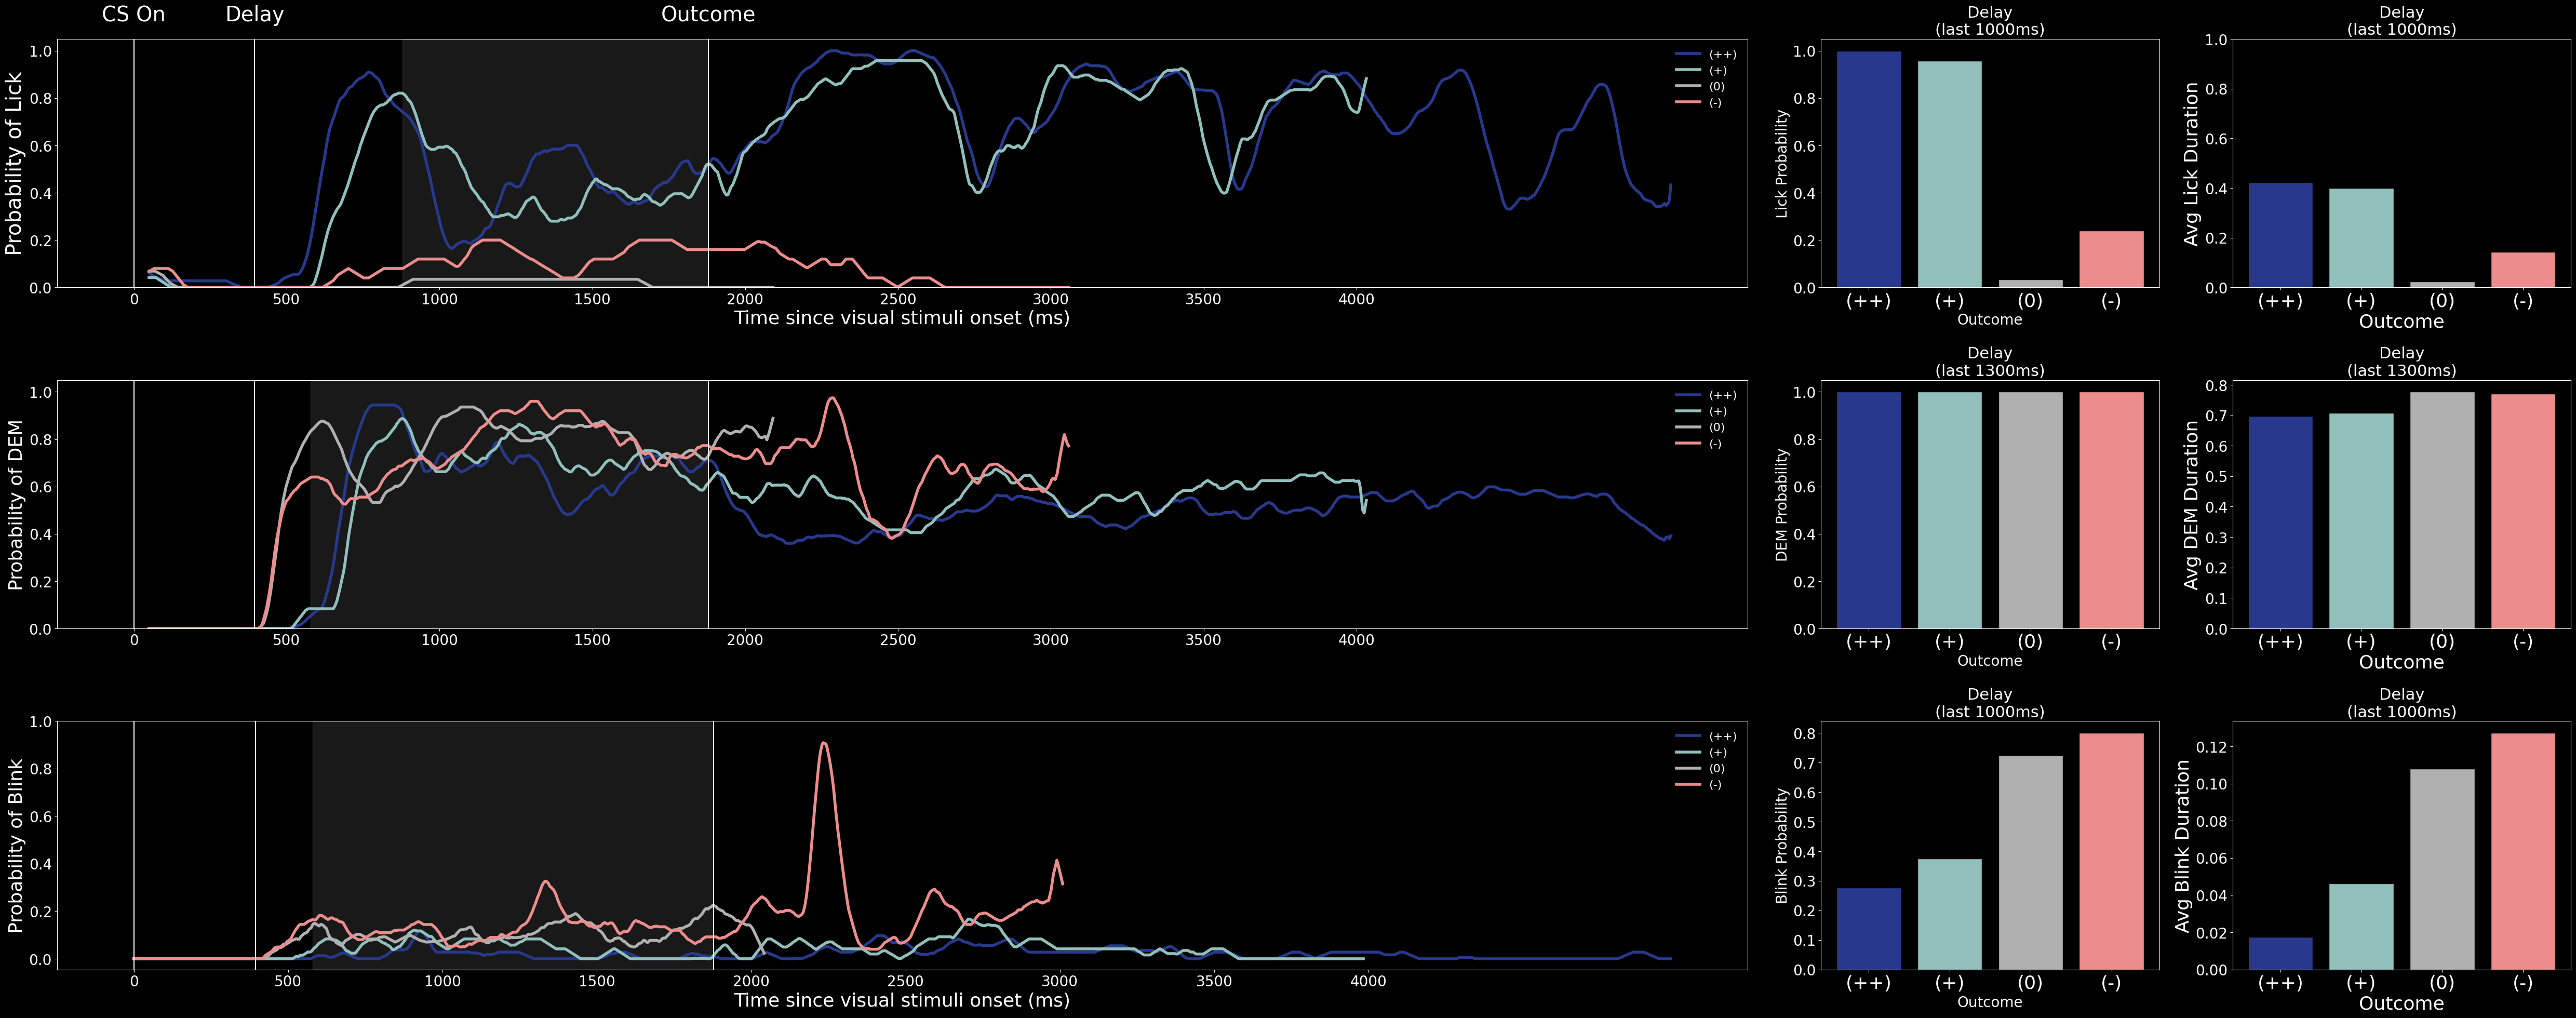

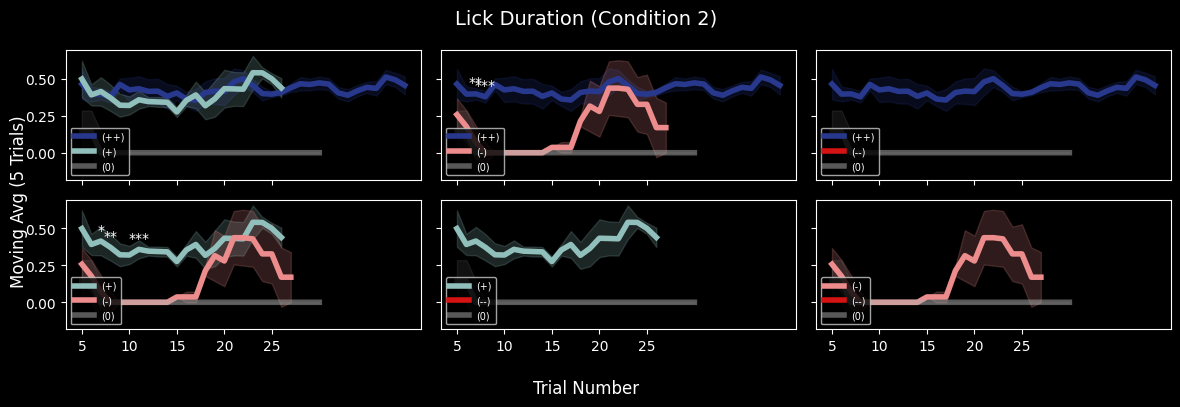

  t_test_DEM-duration_2.png saved.


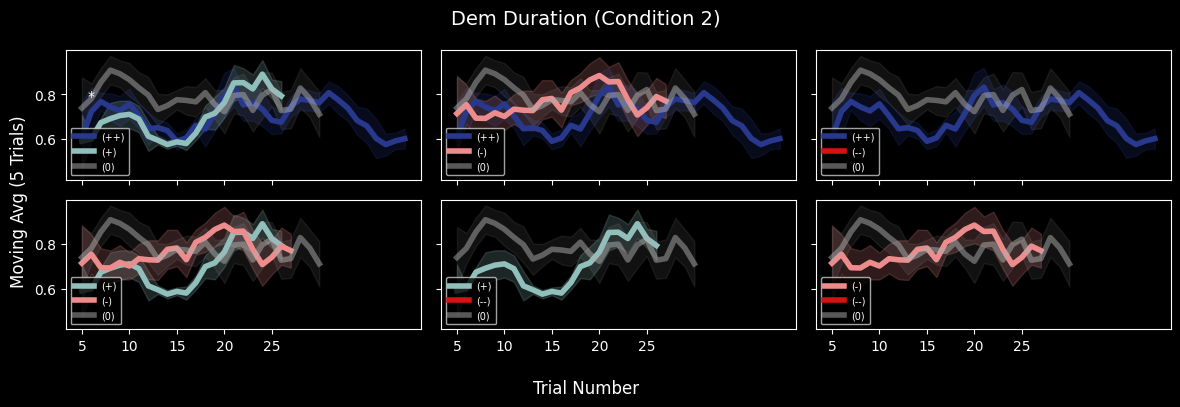

  t_test_blink-duration_2.png saved.


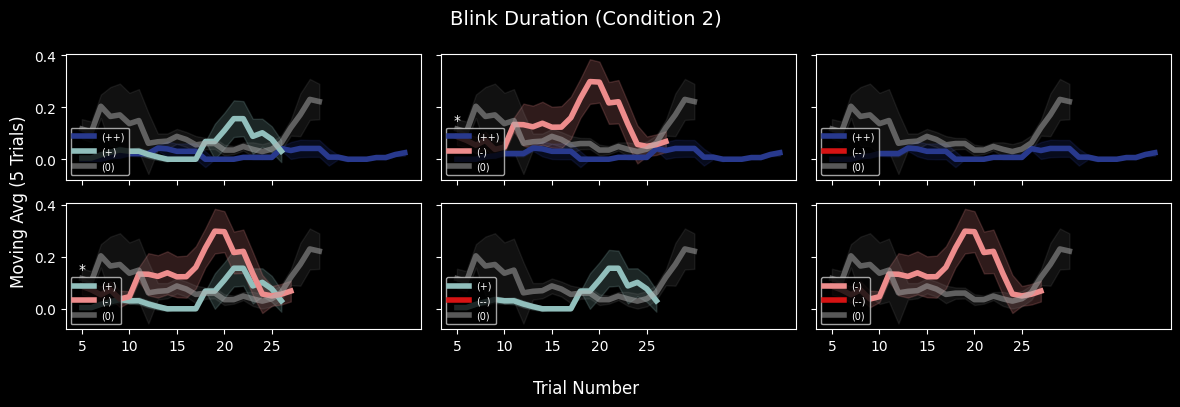

 [0.0, 0.5, 1.0] ANOVA 55.31 | P-value: 3.92E-17
  (0, 1) T-value: -8.625 P-value: 1.20E-11 |  Z-value: -6.337 P-value: 2.34E-10
    0 Lick Mean: 0.072 Lick Std: 0.215 Trials: 54
    1 Lick Mean: 0.42 Lick Std: 0.11 Trials: 17
  (0, 2) T-value: -10.075 P-value: 3.61E-16 |  Z-value: -9.081 P-value: 1.08E-19
    0 Lick Mean: 0.072 Lick Std: 0.215 Trials: 54
    2 Lick Mean: 0.426 Lick Std: 0.115 Trials: 37
  (1, 2) T-value: -0.189 P-value: 8.52E-01 |  Z-value: -0.187 P-value: 8.52E-01
    1 Lick Mean: 0.42 Lick Std: 0.11 Trials: 17
    2 Lick Mean: 0.426 Lick Std: 0.115 Trials: 37
  grant_lick.png saved.
 [0.0, 0.5] ANOVA 3.486 | P-value: 6.46E-02
  (0, 1) T-value: -1.944 P-value: 6.02E-02 |  Z-value: -1.867 P-value: 6.19E-02
    0 DEM Mean: 0.713 DEM Std: 0.157 Trials: 86
    1 DEM Mean: 0.783 DEM Std: 0.145 Trials: 22
  grant_dem.png saved.
 [0.0, 0.5] ANOVA 13.803 | P-value: 3.26E-04
  (0, 1) T-value: -2.723 P-value: 1.17E-02 |  Z-value: -3.715 P-value: 2.03E-04
    0 Blink Mean: 0.05

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.14, p_val: 4.29E-01
  (--) vs (0): ks_stat: 0.63, p_val: 1.06E-16
  (--) vs (+): ks_stat: 0.52, p_val: 3.39E-10
  (-) vs (0): ks_stat: 0.71, p_val: 3.10E-17
  (-) vs (+): ks_stat: 0.59, p_val: 7.78E-11
  (0) vs (+): ks_stat: 0.19, p_val: 1.28E-01
Blink
  (--) vs (-): ks_stat: 0.1, p_val: 8.05E-01
  (--) vs (0): ks_stat: 0.43, p_val: 9.04E-08
  (--) vs (+): ks_stat: 0.5, p_val: 1.52E-09
  (-) vs (0): ks_stat: 0.41, p_val: 9.67E-06
  (-) vs (+): ks_stat: 0.47, p_val: 8.97E-07
  (0) vs (+): ks_stat: 0.19, p_val: 1.32E-01
Total Eye Positions: 111000
Histogram Positions: 109340
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0024 0.0116 0.001  0.0037 0.0022 0.002 ]
 [0.0001 0.0035 0.0609 0.1266 0.1089 0.0238 0.0182 0.0097]
 [0.     0.0024 0.047  0.0896 0.2289

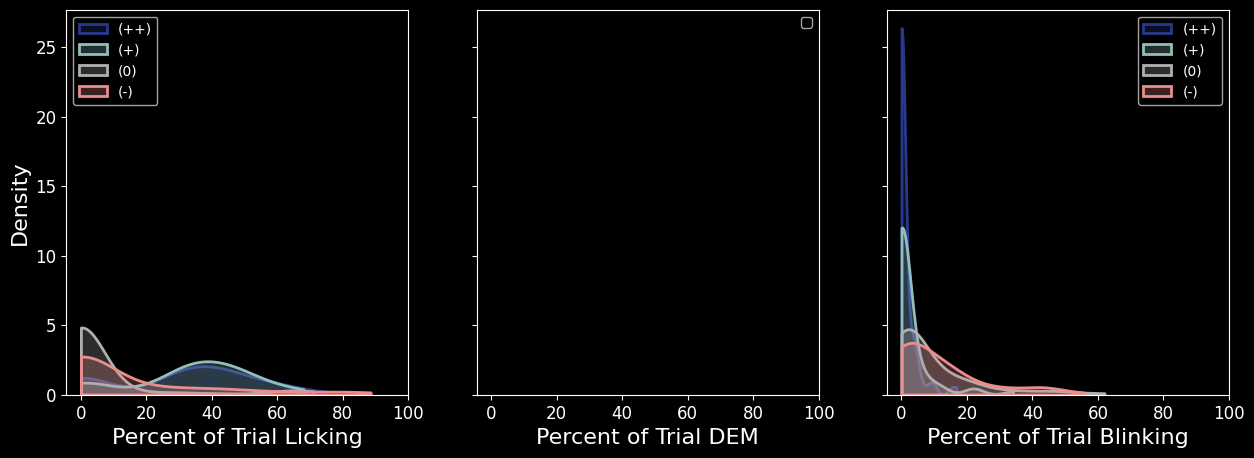

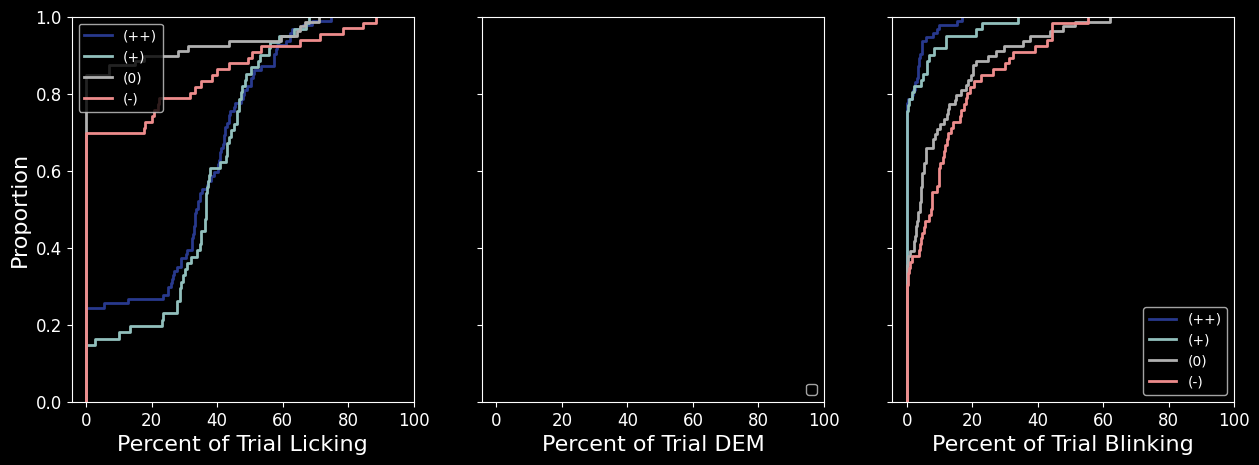

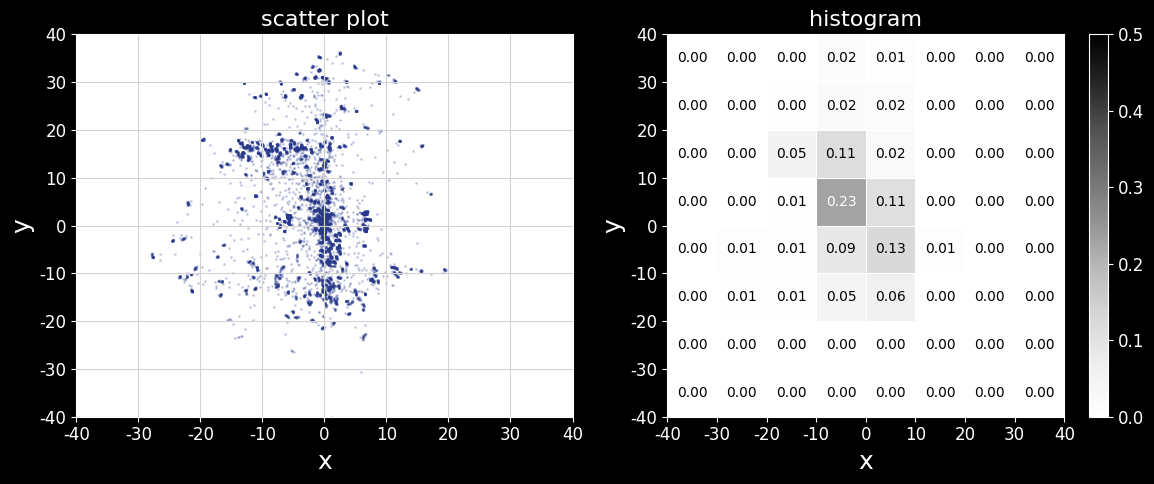

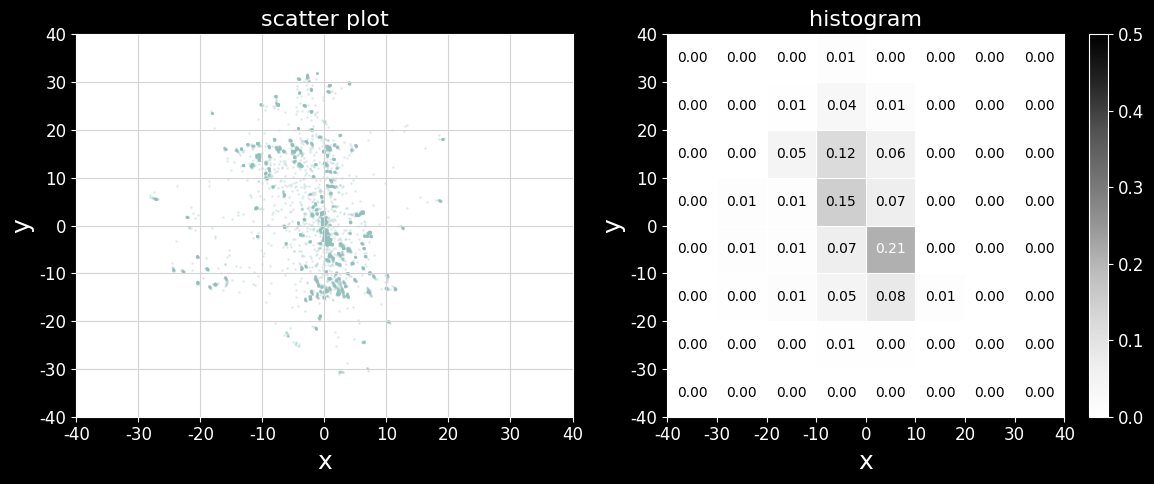

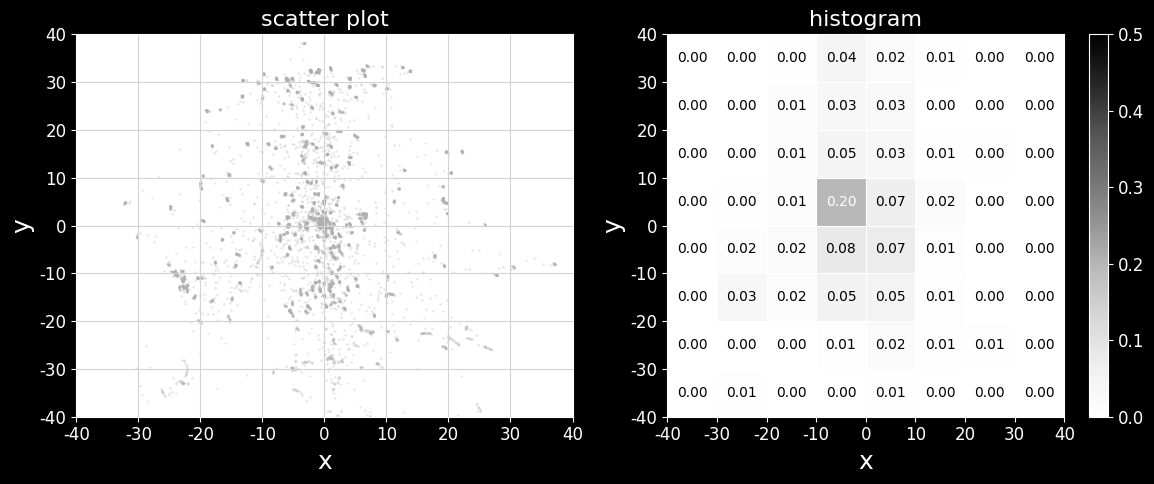

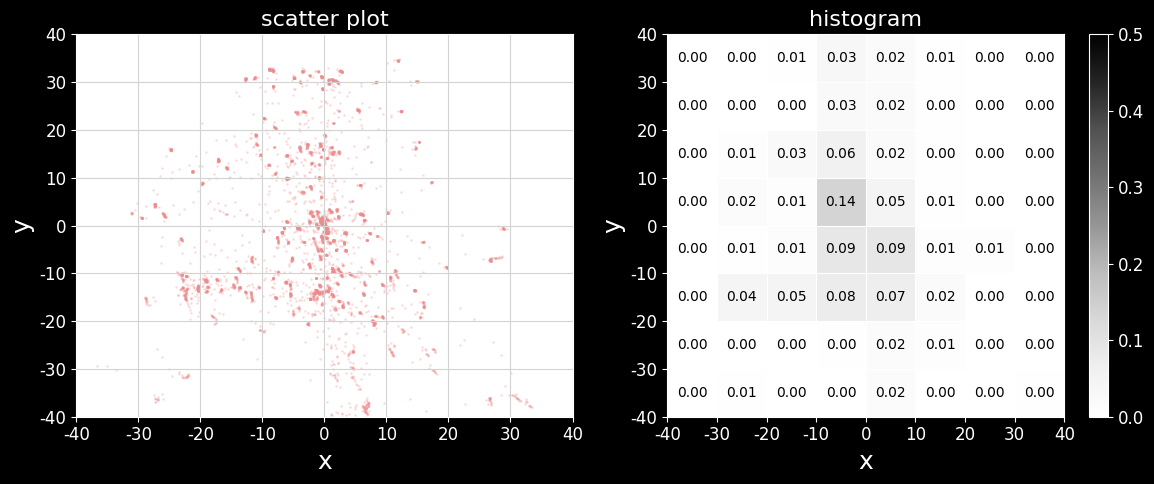

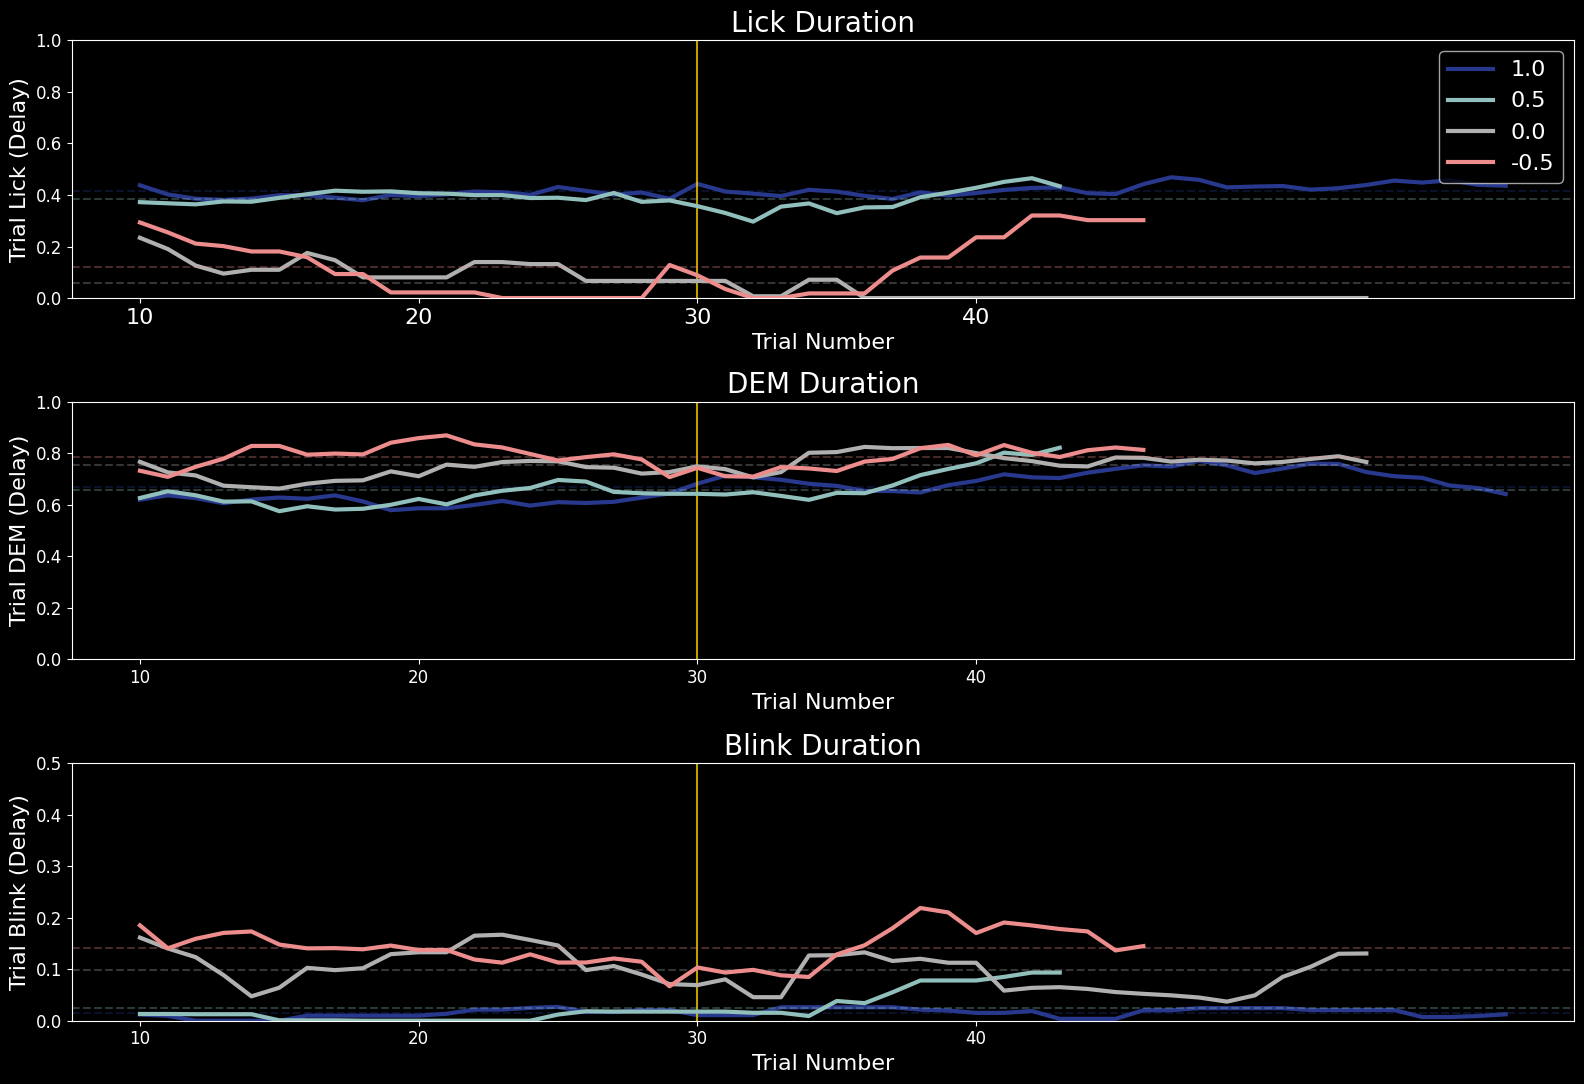

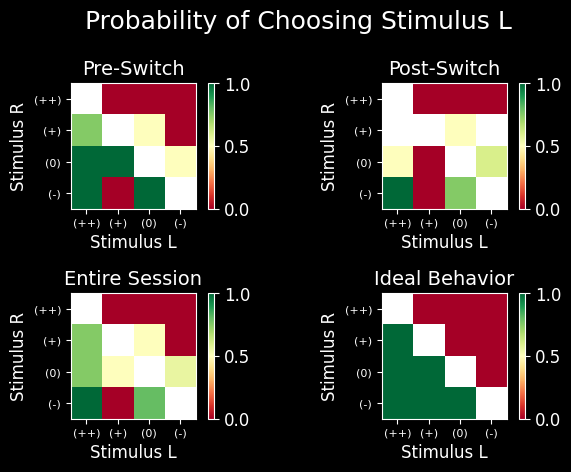

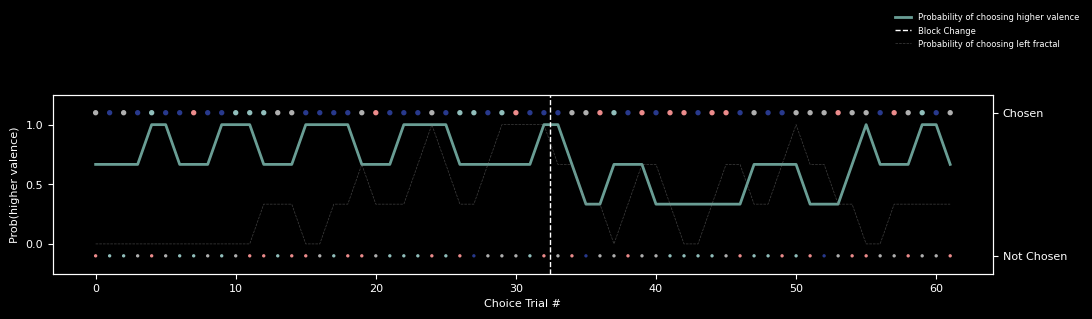

Reward vs. Airpuff Accuracy: 0.87 (+/- 0.27)
  lick_duration: 2.697
  blink_duration_offscreen: -0.307
  pupil_raster_window_avg: -0.453
  blink_duration_window: -0.701
  eye_distance: -0.003


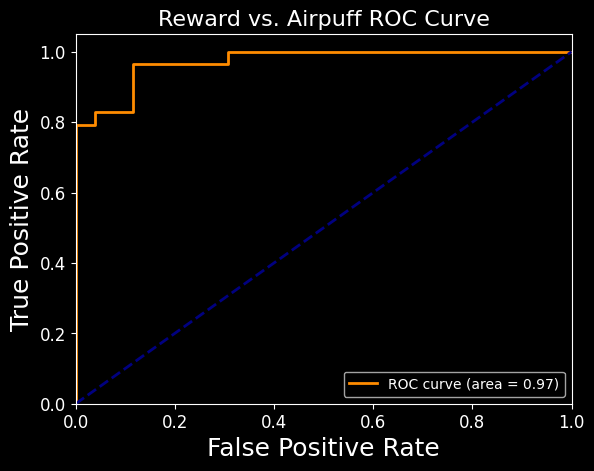

Large Reward vs. Small Reward Accuracy: 0.54 (+/- 0.23)
  lick_duration: 0.447
  blink_duration_offscreen: 0.093
  pupil_raster_window_avg: 0.011
  blink_duration_window: 0.114
  eye_distance: -0.0


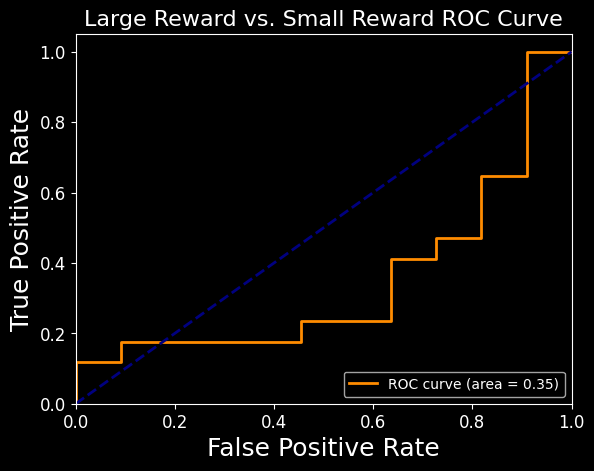


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20240308_bear.md
Writing to excel...
  Writing 240308 to Emotion_Tracker.xlsx


In [19]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

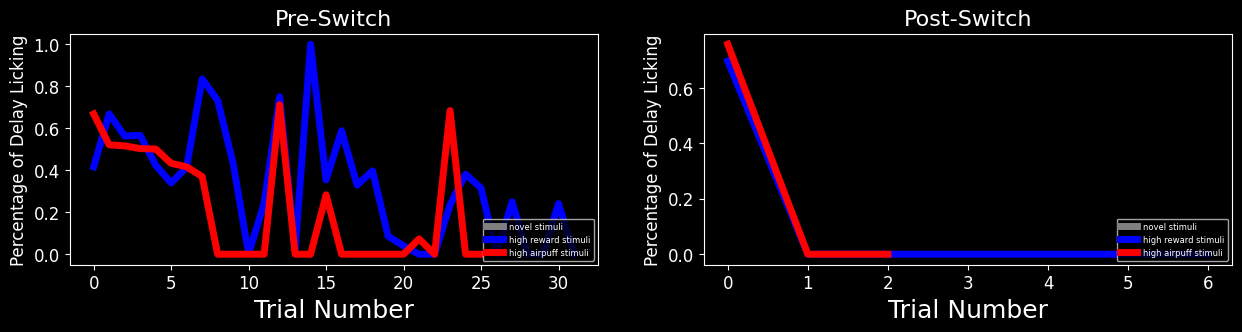

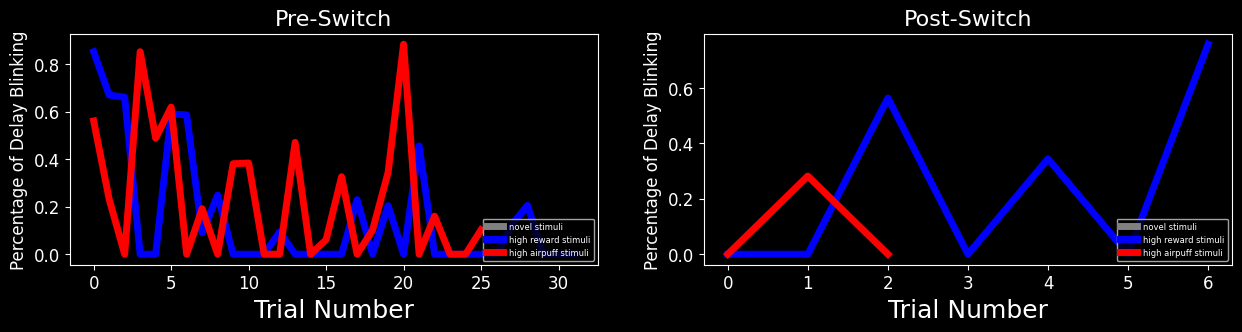

In [9]:
def novel_fractal_summary(session_df):
  session_df_correct = session_df[session_df['correct'] == 1]
  session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
  
  f, axarr = plt.subplots(1, 2, figsize=(15, 3))
  for i in [1,2]:
    session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
    session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
    session_novel = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) & (session_df_reinforcement['block'] == i)]
    session_novel_lick = session_novel['lick_duration']
    session_high_reward_lick = session_high_reward['lick_duration']
    session_high_airpuff_lick = session_high_airpuff['lick_duration']
    axarr[i-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
    axarr[i-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
    axarr[i-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
    # # select row with index block_change
    axarr[i-1].set_xlabel('Trial Number')
    axarr[i-1].set_ylabel('Percentage of Delay Licking', fontsize=12)
    if i == 1:
      axarr[i-1].set_title('Pre-Switch')
    else:
      axarr[i-1].set_title('Post-Switch')
    axarr[i-1].legend(loc='lower right', fontsize=6)
  plt.show()

  f, axarr = plt.subplots(1, 2, figsize=(15, 3))
  for i in [1,2]:
    session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
    session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
    session_novel = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) & (session_df_reinforcement['block'] == i)]
    session_novel_blink = session_novel['blink_duration_window']
    session_high_reward_blink = session_high_reward['blink_duration_window']
    session_high_airpuff_blink = session_high_airpuff['blink_duration_window']
    axarr[i-1].plot(range(len(session_novel_blink)), session_novel_blink, label='novel stimuli', color='grey', lw=5)
    axarr[i-1].plot(range(len(session_high_reward_blink)), session_high_reward_blink, label='high reward stimuli', color='blue', lw=5)
    axarr[i-1].plot(range(len(session_high_airpuff_blink)), session_high_airpuff_blink, label='high airpuff stimuli', color='red', lw=5)
    # # select row with index block_change
    axarr[i-1].set_xlabel('Trial Number')
    axarr[i-1].set_ylabel('Percentage of Delay Blinking', fontsize=12)
    axarr[i-1].legend(loc='lower right', fontsize=6)
    if i == 1:
      axarr[i-1].set_title('Pre-Switch')
    else:
      axarr[i-1].set_title('Post-Switch')
  plt.show()

novel_fractal_summary(session_df)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [10]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.701 (143/204)
   Valence 1.0: 0.736 (39/53)
   Valence 0.5: 0.635 (33/52)
   Valence -0.5: 0.7 (42/60)
   Valence -1.0: 0.744 (29/39)
 Percent successful choice trials: 0.789 (60/76)
   Valence Pair [-1.0, 1.0]: 1.0 (2/2)
   Valence Pair [-1.0, -0.5]: 0.944 (17/18)
   Valence Pair [0.5, 1.0]: 0.905 (19/21)
   Valence Pair [-0.5, 0.5]: 0.733 (11/15)
   Valence Pair [-0.5, 1.0]: 0.556 (5/9)
   Valence Pair [-1.0, 0.5]: 0.545 (6/11)
 Percent left choice trials: 0.617 (37/60)
 Percent higher valence choice trials: 0.667 (40/60)
   Valence Pair [-1.0, 1.0]: 1.0 (2/2)
   Valence Pair [-0.5, 1.0]: 1.0 (5/5)
   Valence Pair [-0.5, 0.5]: 0.818 (9/11)
   Valence Pair [0.5, 1.0]: 0.737 (14/19)
   Valence Pair [-1.0, 0.5]: 0.5 (3/6)
   Valence Pair [-1.0, -0.5]: 0.412 (7/17)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 141.615
   Valence Not Chosen: -0.5 120.7 (10)
   Valence Not Chosen: 0.5 211.333 (3)
 Valence: 

In [11]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg  \
valence                                                                     
-1.0          0.222000                  0.518435                 0.135782   
-0.5          0.147643                  0.537857                 0.232985   
 0.5          0.261485                  0.453310                 0.165897   
 1.0          0.290179                  0.378166                 0.110099   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.222069     75.506056  
-0.5                  0.290751     86.525545  
 0.5                  0.230396     62.827619  
 1.0                  0.171321     63.810188

In [12]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
2        1        0.5       -0.5      0.5               1
10       1        0.5       -0.5      0.5               1
27       1        0.5        1.0      0.5               0
28       1       -1.0        1.0      1.0               1
35       1       -0.5        0.5      0.5               1
43       1       -0.5       -1.0     -1.0               0
46       1       -0.5       -1.0     -1.0               0
48       1       -0.5        1.0      1.0               1
50       1        0.5        1.0      0.5               0
62       1       -1.0        0.5      0.5               1
68       1        1.0        0.5      1.0               1
69       1        0.5        1.0      0.5               0
76       1       -0.5       -1.0     -1.0               0
80       1       -1.0        0.5      0.5               1
81       1        1.0        0.5      1.0               1
84       1        1.0       -0.5      1.0               1
90       1        0.5        1.0      1.0               1
96       1        1.0        0.5      1.0               1
101      1       -1.0       -0.5     -1.0               0
109      1        1.0       -0.5      1.0               1
111      1       -1.0        1.0      1.0               1
112      1        0.5        1.0      1.0               1
130      1        0.5        1.0      1.0               1
132      1       -0.5        0.5      0.5               1
141      1       -0.5        1.0      1.0               1
151      1       -1.0       -0.5     -1.0               0
160      1       -1.0       -0.5     -1.0               0
164      1       -0.5       -1.0     -0.5               1
168      1        1.0        0.5      1.0               1
181      1        0.5       -0.5      0.5               1
184      1        0.5       -0.5      0.5               1
185      1        0.5       -0.5      0.5               1
186      1       -1.0       -0.5     -1.0               0
190      1        0.5        1.0      1.0               1
193      1        0.5       -0.5      0.5               1
199      1       -0.5       -1.0     -0.5               1
203      1        0.5       -0.5      0.5               1
215      1        1.0        0.5      1.0               1
234      1        1.0       -0.5      1.0               1
236      1        0.5        1.0      1.0               1
237      1        0.5       -1.0     -1.0               0
241      1        1.0        0.5      1.0               1
244      1       -1.0        0.5     -1.0               0
255      1        0.5        1.0      1.0               1
262      1        1.0        0.5      1.0               1
271      1       -0.5       -1.0     -1.0               0
282      1       -0.5       -1.0     -1.0               0
308      1       -0.5        0.5     -0.5               0
339      1       -0.5        0.5     -0.5               0
347      1       -1.0       -0.5     -1.0               0
357      1        0.5       -1.0      0.5               1
359      1        1.0        0.5      1.0               1
376      2       -0.5       -1.0     -0.5               1
377      2       -1.0       -0.5     -0.5               1
436      2        0.5        1.0      0.5               0
476      2        0.5        1.0      0.5               0
485      2       -1.0       -0.5     -0.5               1
488      2       -0.5       -1.0     -0.5               1
511      2       -1.0        0.5     -1.0               0
513      2       -1.0       -0.5     -0.5               1

In [16]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               18.807692       0.750346  \
          _fractal_B          0.5               18.629630       0.686519   
          _fractal_C         -0.5               15.884615       0.787731   
          _fractal_D         -1.0               21.612903       0.830161   
          _fractal_E          0.0                4.000000       0.793714   
2         _fractal_A         -0.5               16.320000       0.643400   
          _fractal_B         -1.0               16.222222       0.717444   
          _fractal_C          1.0               20.269231       0.631654   
          _fractal_D          0.5               16.208333       0.591417   
          _fractal_E          0.0                7.000000       0.704000   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.546124                 0.001006  \
          _fractal_B                      0.555869                 0.002849   
          _fractal_C                      0.630296                 0.019675   
          _fractal_D                      0.654764                 0.024888   
          _fractal_E                      0.676154                 0.005934   
2         _fractal_A                      0.647446                 0.032431   
          _fractal_B                      0.708177                 0.026325   
          _fractal_C                      0.569556                 0.000000   
          _fractal_D                      0.547917                 0.002885   
          _fractal_E                      0.668047                 0.039053   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.008166    120.872027  
          _fractal_B                   0.019459    158.318561  
          _fractal_C                   0.059053    386.867690  
          _fractal_D                   0.065658    478.451181  
          _fractal_E                   0.009560    173.239310  
2         _fractal_A                   0.096338    481.803176  
          _fractal_B                   0.060228    387.554391  
          _fractal_C                   0.000000    109.505773  
          _fractal_D                   0.010513    161.040100  
          _fractal_E                   0.103669    573.823778

### Behavioral Summary Panels by Valence

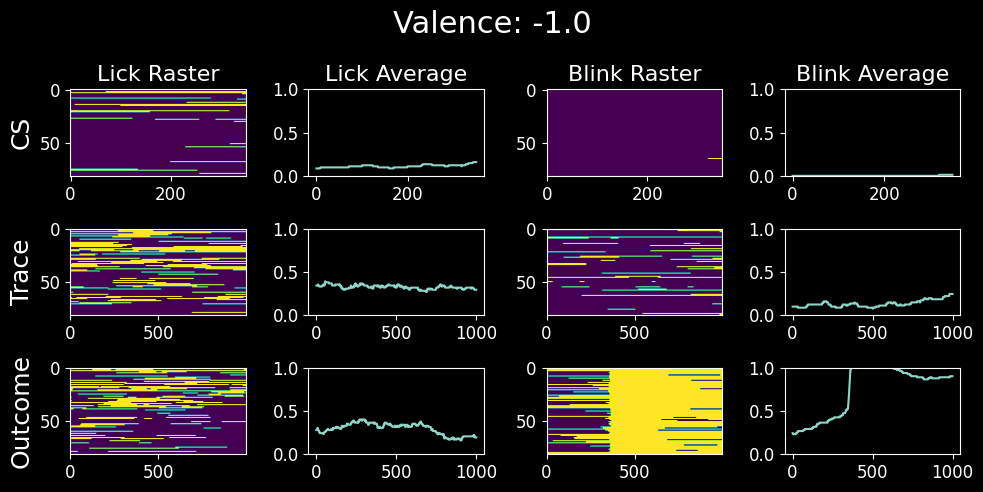

Valence: -1.0
  Lick CS: 0.112
  Lick Trace: 0.325
  Lick Outcome: 0.296


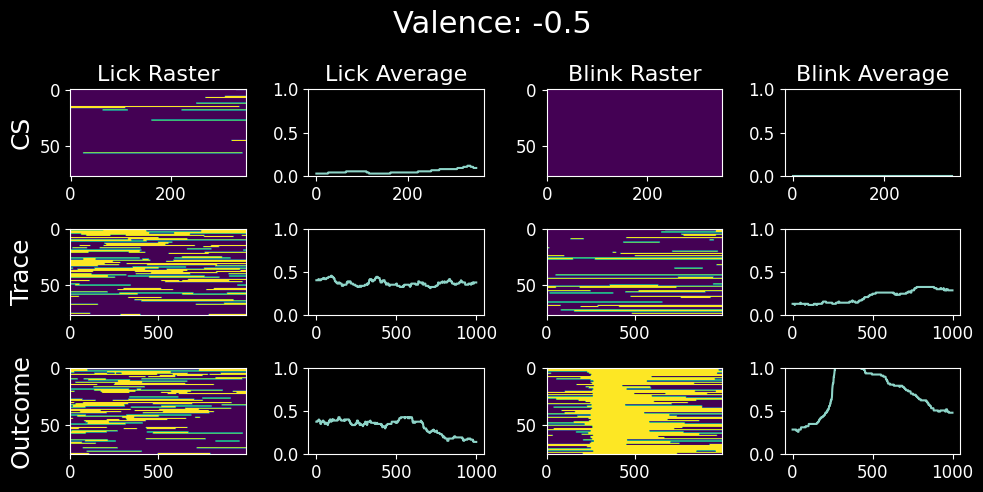

Valence: -0.5
  Lick CS: 0.052
  Lick Trace: 0.37
  Lick Outcome: 0.321


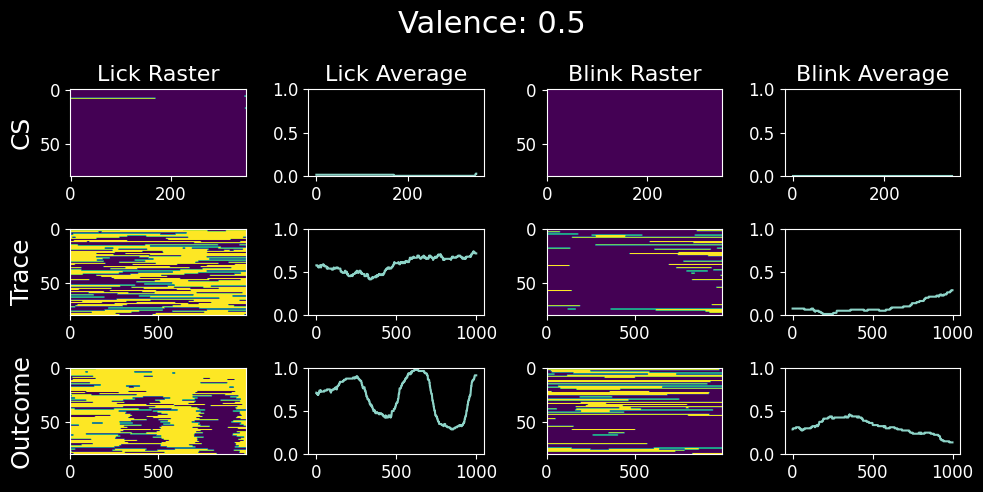

Valence: 0.5
  Lick CS: 0.006
  Lick Trace: 0.583
  Lick Outcome: 0.664


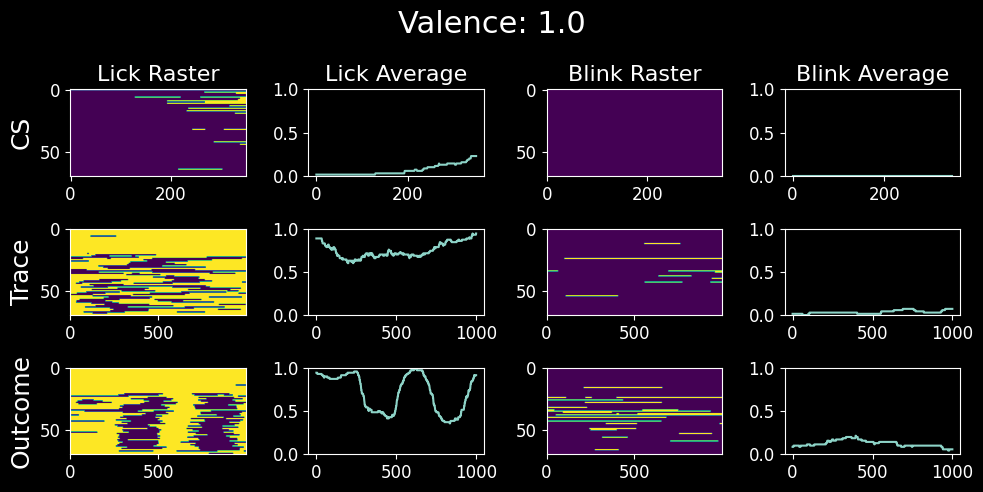

Valence: 1.0
  Lick CS: 0.065
  Lick Trace: 0.747
  Lick Outcome: 0.708


In [13]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [19]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 30) &
											 (session_df_correct['lick_duration'] > 0.8)]\
			[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
20   231130         21      0.0          1.000                  0.000000  \
33   231130         34     -1.0          1.000                  0.000000   
102  231130        103     -0.5          0.873                  0.000000   
135  231130        136      1.0          1.000                  0.000000   
146  231130        147      0.5          0.817                  0.000000   
160  231130        161      1.0          1.000                  0.000000   
183  231130        184      0.5          0.868                  0.000000   
210  231130        211      0.5          1.000                  0.000000   
242  231130        243     -0.5          0.996                  0.000000   
245  231130        246     -0.5          0.829                  0.000000   
253  231130        254      0.5          0.907                  0.067692   
367  231130        368      1.0          1.000                  0.224615   

     eye_distance  
20       9.108011  
33      10.254926  
102      7.162470  
135      6.783016  
146     18.044618  
160     24.778684  
183     26.993805  
210      9.086916  
242      9.679895  
245      8.542372  
253     20.976933  
367     28.613280

### High DEM + Blink + Eye Movement / Low Lick Trials

In [20]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.25) &
											 (session_df_correct['eye_distance'] > 100) & 
											 (session_df_correct['lick_duration'] < 0.75)]\
		[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
26   231130         27      0.0          0.484                  0.943077  \
78   231130         79     -0.5          0.000                  0.903846   
111  231130        112     -1.0          0.000                  0.753846   
116  231130        117     -1.0          0.351                  0.562308   
118  231130        119      0.0          0.450                  0.269231   
152  231130        153     -1.0          0.410                  0.938462   
153  231130        154     -0.5          0.000                  0.853846   
162  231130        163     -0.5          0.304                  0.568462   
163  231130        164     -1.0          0.267                  0.284615   
181  231130        182      0.0          0.320                  0.938462   
198  231130        199     -0.5          0.000                  0.920000   
202  231130        203     -0.5          0.580                  0.254615   
220  231130        221     -0.5          0.604                  0.941538   
222  231130        223     -0.5          0.434                  0.455385   
228  231130        229     -1.0          0.345                  0.607692   
234  231130        235     -0.5          0.262                  0.562308   
240  231130        241     -1.0          0.000                  1.000000   
272  231130        273     -1.0          0.647                  0.251538   
286  231130        287     -0.5          0.000                  0.490769   
297  231130        298      0.5          0.422                  0.263077   
298  231130        299      0.5          0.571                  0.553846   
301  231130        302      0.5          0.000                  0.953846   
307  231130        308      0.5          0.413                  0.825385   
324  231130        325     -0.5          0.233                  0.530000   
333  231130        334     -0.5          0.619                  0.920000   
339  231130        340     -0.5          0.209                  0.952308   
356  231130        357     -0.5          0.000                  1.000000   
360  231130        361     -1.0          0.448                  0.261538   
368  231130        369      1.0          0.676                  0.606923   
377  231130        378     -1.0          0.346                  0.352308   
386  231130        387      0.5          0.652                  0.370000   
395  231130        396     -0.5          0.436                  0.726923   
419  231130        420      1.0          0.000                  1.000000   

     eye_distance  
26     668.228346  
78     373.202589  
111    237.442456  
116    208.426464  
118    174.708488  
152    872.823584  
153    239.837158  
162   1441.129237  
163    352.828007  
181    431.137893  
198    184.345805  
202    344.943967  
220   2784.000921  
222    418.601822  
228    660.028699  
234    228.178900  
240    660.862756  
272    357.420554  
286    376.198044  
297    217.162192  
298    413.774265  
301    910.702694  
307    265.094981  
324   1847.401582  
333    124.914257  
339    377.126669  
356   5203.212986  
360   1017.061008  
368    399.147964  
377    226.066845  
386   1002.099602  
395    173.160073  
419    726.940133

In [21]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation 0.157
Lick vs. Blink Correlation 0.011
DEM vs. Blink Correlation 0.381
Pupil 0 vs. Blink Correlation 0.92


***
### Video Test

In [22]:
trial_specified = 27
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
26                    1      0.0     _fractal_B         0.0          0.0  \

    lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
26          0.484                  0.943077                 0.104615  \

    blink_duration_window  
26               0.263846

***
## Single Trial Analysis

In [16]:
trial_selected = 15
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
14        1     -0.5            1.0                 0.0  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
14                  0.149231                      0.0                    0.0  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
14     56.179174          4488           <NA>            4506

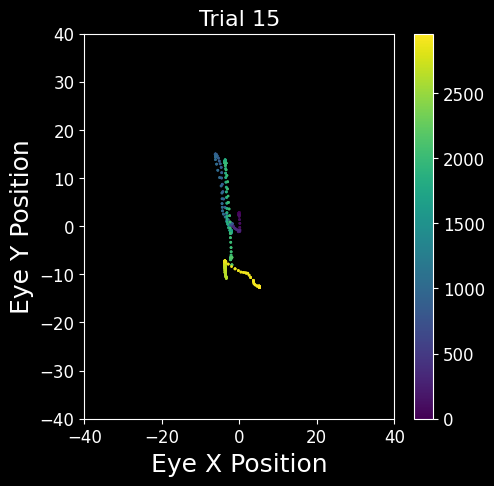

In [17]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1500
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5187 0.352  0.1293 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 12.93%
outside x,y [-40, 40]: 0.0%
  eye_heatmap_-0.5.png saved.


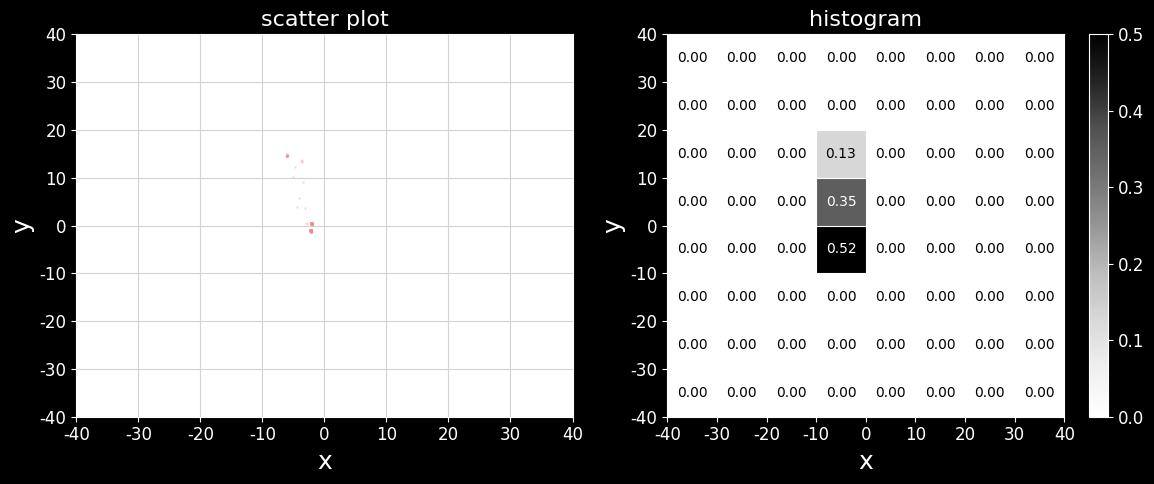

In [18]:
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [100]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': True}

parse_wm_videos(**kwargs)

Parsing Trials for Videos: 0 - 1176
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 0    | Frames: 368-547
  Video complete: Cam: e3v8360 | Trial: 227  | Frames: 9066-9245
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 65   | Frames: 46190-46367
  Video complete: Cam: e3v8360 | Trial: 257  | Frames: 32736-32915
  Video complete: Cam: e3v8360 | Trial: 3    | Frames: 3533-3711
  Video complete: Cam: e3v8360 | Trial: 1    | Frames: 1529-1706
  Video complete: Cam: e3v8360 | Trial: 215  | Frames: 25-203
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 427  | Frames: 4125-4303
  Video complete: Cam: e3v8360 | Trial: 97   | Frames: 67457-67636
  Video complete: Cam: e3v8360 | Trial: 118  | Frames: 81274-81452
  Video complete: Cam: e3v8360 | Trial: 641  | Frames: 808-987
  Video complete: Cam: e3v8360 | Trial

## Generate MonkeyLogic Behavior Trial Videos


In [36]:
from video.ml_videos import generate_ml_behavior_videos
trial_selected = 3
generate_ml_behavior_videos(session_df, session_obj, trial_selected, 'Trace Start', 'Outcome Start')

Generating video for trial 3
  Generating frames for trial 3 from 3080 to 4570


Trial 3 frame:   0%|          | 0/1490 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/eye_0002.mp4


Trial 2 eye:   0%|          | 0/1490 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/lick_0002.mp4


Trial 2 lick:   0%|          | 0/1490 [00:00<?, ?it/s]

Deleting image folder: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/trial_2


TypeError: 'recursive' is an invalid keyword argument for rmdir()

In [39]:
import shutil
shutil.rmtree('/Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/trial_1')

***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
   video_path_list = dlc_video_path_dict[key]
   video_list_subset = video_path_list[:]
   config_path = config_path_dict[key]
   # Adding new videos to the config.yaml file
   deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
               coords=None, extract_frames=False
   )

   # Analyze specified videos
   deeplabcut.analyze_videos(config_path, video_list_subset, 
               videotype, save_as_csv=True
   )

   # Filter predictions
   deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

   # Create labeled videos
   deeplabcut.create_labeled_video(
      config_path, video_list_subset, 
      videotype, 
      draw_skeleton=True, 
      filtered=True,
      trailpoints=5,
   )

   # Plot trajectories
   deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
  dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')